In [80]:
import numpy as np
import pandas as pd
import matplotlib.style
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.6f}'.format
plt.style.use("seaborn-v0_8")

In [81]:
class IterativeBase():
    
    def __init__(self, symbol, start, end, amount):
        self.symbol = symbol
        self.start = start
        self.initial_balance = amount
        self.current_balance = amount
        self.units = 0
        self.trades = 0
        self.data = self.get_data()

    def get_data(self):
        df = pd.read_csv('eurusd_minute.csv', usecols=['Date', 'Time', 'BC', 'AC'])
        df['Datetime'] = df['Date'] + ' ' + df['Time']
        df['Datetime'] = pd.to_datetime(df['Datetime'])
        df = df.drop(['Date', 'Time'], axis=1)
        df = df.set_index('Datetime')
        df.rename(columns={"BC": "bid", "AC": "ask"}, inplace=True)
        df['price'] = (df['bid']+df['ask'])/2
        df['spread'] = df['ask']-df['bid'] 
        df['returns'] = np.log(df['price'].div(df['price'].shift(1)))
        return df
    
    def buy(self, bar, units = None, amount = None):
        date, price, spread = self.get_values(bar)
        if amount is not None:
            units = int(amount/price)
        self.current_balance -= units * price
        self.units += units
        self.trades +=1
        print("{} | Buying {} for {}".format(date, units, round(price,2)))
    
    def plot_data(self, cols = None):
        if cols == None:
            cols = 'price'
        self.data[cols].plot(figsize=(12,8), title=self.symbol)
        
    def get_values(self,bar):
        date = str(self.data.index[bar].date())
        price = round(self.data.price.iloc[bar], 6)
        spread = round(self.data.spread.iloc[bar], 6)
        return date, price, spread
    
    def print_current_balance(self,bar):
        date, price, spread = self.get_values(bar) 
        print("{} | Current Balance: {}".format(date, round(self.current_balance, 2)))
        
    def print_current_position(self, bar):
        date, price, spread = self.get_values(bar)
        cpv = self.units * price
        print("{} | Current Position Value: {}".format(date, round(cpv, 2)))
        
    def print_current_nav(self, bar):
        date, price, spread = self.get_values(bar)
        nav = self.current_balance + self.units*price
        print("{} | Current Nav: {}".format(date, round(nav, 2)))
        

In [82]:
bc = IterativeBase("EURUSD", '2006-12-31', '2020-06-30', 1e5)

In [83]:
bc.data

,bid,ask,price,spread,returns
Datetime,,,,,
2005-01-02 18:29:00,1.355500,1.356500,1.356000,0.001000,NaN
2005-01-02 18:38:00,1.355500,1.356500,1.356000,0.001000,0.000000
2005-01-02 18:51:00,1.356200,1.357200,1.356700,0.001000,0.000516
2005-01-02 18:52:00,1.356000,1.357000,1.356500,0.001000,-0.000147
2005-01-02 18:55:00,1.356300,1.357300,1.356800,0.001000,0.000221
...,...,...,...,...,...
2020-04-29 23:55:00,1.087640,1.087780,1.087710,0.000140,-0.000064
2020-04-29 23:56:00,1.087570,1.087720,1.087645,0.000150,-0.000060
2020-04-29 23:57:00,1.087590,1.087730,1.087660,0.000140,0.000014


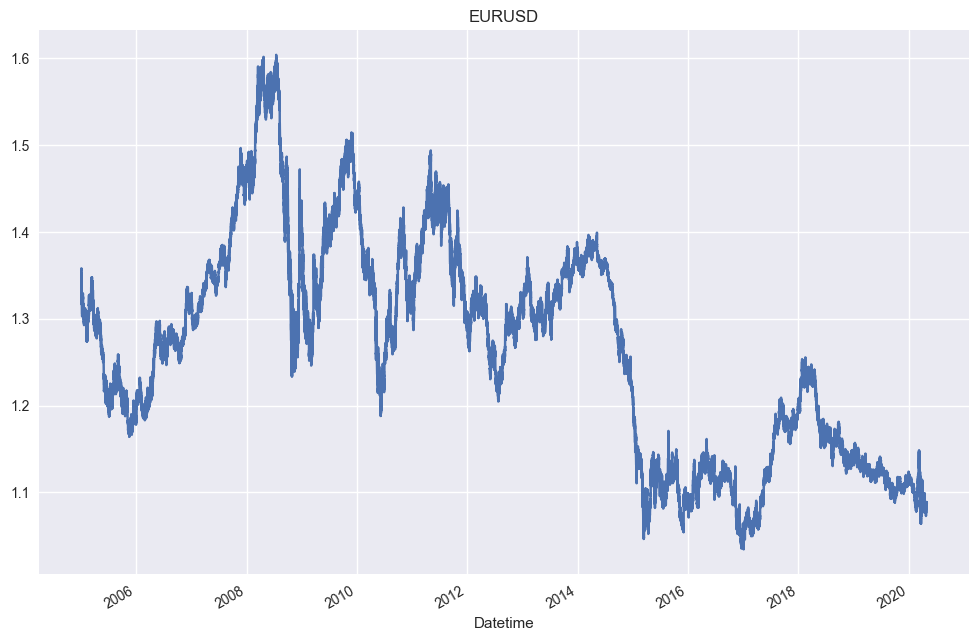

In [84]:
bc.plot_data()

In [85]:
bc.get_values(100)

('2005-01-02', np.float64(1.35505), np.float64(0.001))

In [86]:
bc.print_current_balance(100)

2005-01-02 | Current Balance: 100000.0


In [87]:
bc.buy(0, 1000)

2005-01-02 | Buying 1000 for 1.36


In [88]:
bc.print_current_balance(0)

2005-01-02 | Current Balance: 98644.0


In [89]:
bc.print_current_position(0)

2005-01-02 | Current Position Value: 1356.0


In [90]:
bc.print_current_nav(0)

2005-01-02 | Current Nav: 100000.0


In [97]:
bc.print_current_nav()

2020-04-29 | Current Nav: 99731.74
